In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
from sklearn.model_selection import GridSearchCV


In [13]:
# Load the dataset
df = pd.read_excel('Real estate valuation data set.xlsx')


In [14]:
# Display the first five rows of the data
print(df.head())

   No  X1 transaction date  X2 house age  \
0   1          2012.916667          32.0   
1   2          2012.916667          19.5   
2   3          2013.583333          13.3   
3   4          2013.500000          13.3   
4   5          2012.833333           5.0   

   X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                84.87882                               10   
1                               306.59470                                9   
2                               561.98450                                5   
3                               561.98450                                5   
4                               390.56840                                5   

   X5 latitude  X6 longitude  Y house price of unit area  
0     24.98298     121.54024                        37.9  
1     24.98034     121.53951                        42.2  
2     24.98746     121.54391                        47.3  
3     24.98746     121.54391  

In [15]:
# Basic statistics
print(df.describe())

               No  X1 transaction date  X2 house age  \
count  414.000000           414.000000    414.000000   
mean   207.500000          2013.148953     17.712560   
std    119.655756             0.281995     11.392485   
min      1.000000          2012.666667      0.000000   
25%    104.250000          2012.916667      9.025000   
50%    207.500000          2013.166667     16.100000   
75%    310.750000          2013.416667     28.150000   
max    414.000000          2013.583333     43.800000   

       X3 distance to the nearest MRT station  \
count                              414.000000   
mean                              1083.885689   
std                               1262.109595   
min                                 23.382840   
25%                                289.324800   
50%                                492.231300   
75%                               1454.279000   
max                               6488.021000   

       X4 number of convenience stores  X5 latitude  

In [16]:
# Check for missing values
print(df.isnull().sum())

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64


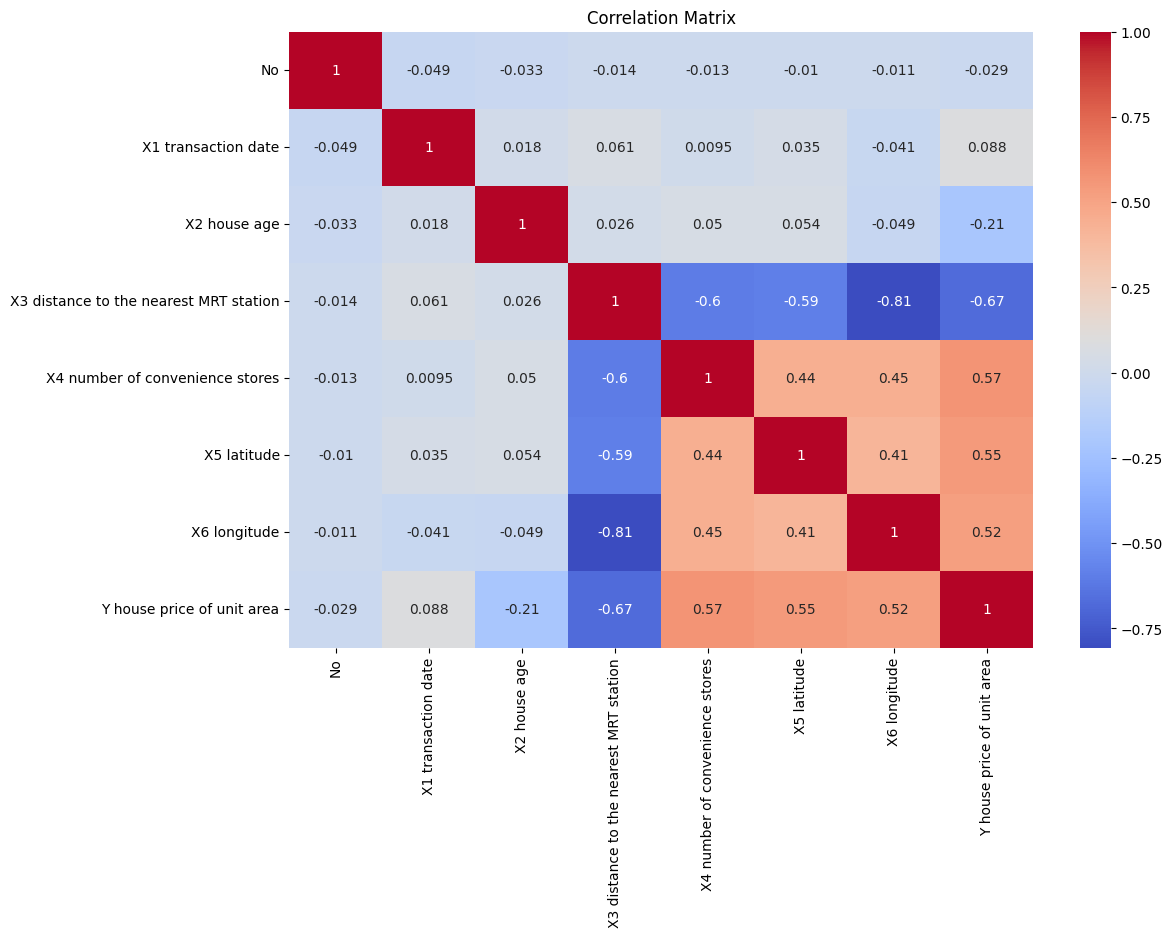

In [17]:
# Correlation matrix heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [18]:
# Select target and features
X = df.drop('Y house price of unit area', axis=1)
y = df['Y house price of unit area']

In [19]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
# Build and train Linear Regression model
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [22]:
# Predict and evaluate the model
y_pred_lr = lr.predict(X_test_scaled)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print(f'Linear Regression MSE: {mse_lr}, R^2: {r2_lr}')

Linear Regression MSE: 54.59884830498963, R^2: 0.674541419569227


In [23]:
# Build and train Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [24]:
# Predict and evaluate the model
y_pred_rf = rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f'Random Forest MSE: {mse_rf}, R^2: {r2_rf}')

Random Forest MSE: 31.85332477108434, R^2: 0.8101253381007657


In [25]:
# Build and train XGBoost model
xgbr = xgb.XGBRegressor(objective ='reg:squarederror', n_estimators=100, seed=42)
xgbr.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [26]:
# Predict and evaluate the model
y_pred_xgbr = xgbr.predict(X_test)
mse_xgbr = mean_squared_error(y_test, y_pred_xgbr)
r2_xgbr = r2_score(y_test, y_pred_xgbr)
print(f'XGBoost MSE: {mse_xgbr}, R^2: {r2_xgbr}')

XGBoost MSE: 34.169690294379635, R^2: 0.7963177018891137


In [27]:
# Hyperparameter tuning for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [4, 5, 6, 7, 8],
    'criterion': ['squared_error', 'absolute_error']
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [28]:
# Display the best hyperparameters
print(f'Best parameters found: {grid_search.best_params_}')
print(f'Best score: {grid_search.best_score_}')

Best parameters found: {'criterion': 'absolute_error', 'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 100}
Best score: 0.6726778348891329


In [29]:
# Build the model with the best hyperparameters
best_rf = grid_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)

mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)
print(f'Optimized Random Forest MSE: {mse_best_rf}, R^2: {r2_best_rf}')


Optimized Random Forest MSE: 31.095466394578278, R^2: 0.8146428603387337


In [30]:
# Compare model results
models = ['Linear Regression', 'Random Forest', 'XGBoost', 'Optimized Random Forest']
mse_values = [mse_lr, mse_rf, mse_xgbr, mse_best_rf]
r2_values = [r2_lr, r2_rf, r2_xgbr, r2_best_rf]

results = pd.DataFrame({
    'Model': models,
    'MSE': mse_values,
    'R^2': r2_values
})

print(results)

                     Model        MSE       R^2
0        Linear Regression  54.598848  0.674541
1            Random Forest  31.853325  0.810125
2                  XGBoost  34.169690  0.796318
3  Optimized Random Forest  31.095466  0.814643


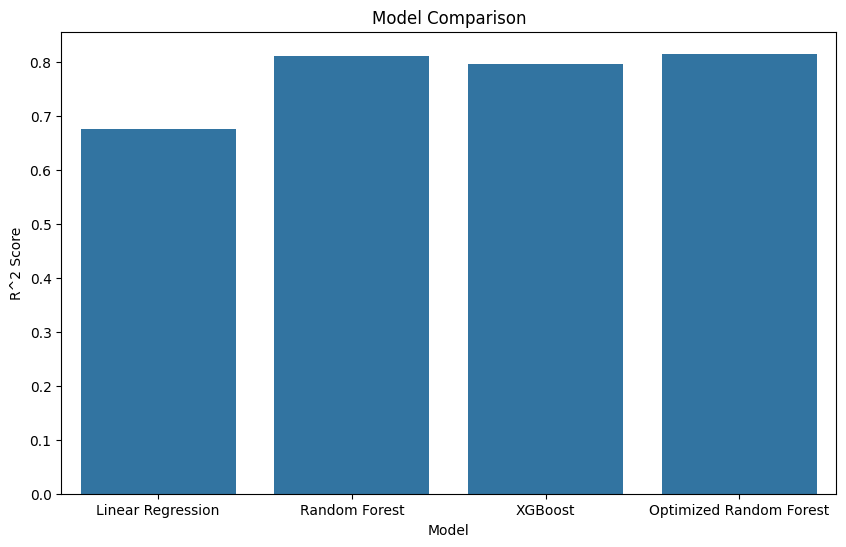

In [31]:
# Plot model comparison
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='R^2', data=results)
plt.title('Model Comparison')
plt.ylabel('R^2 Score')
plt.show()

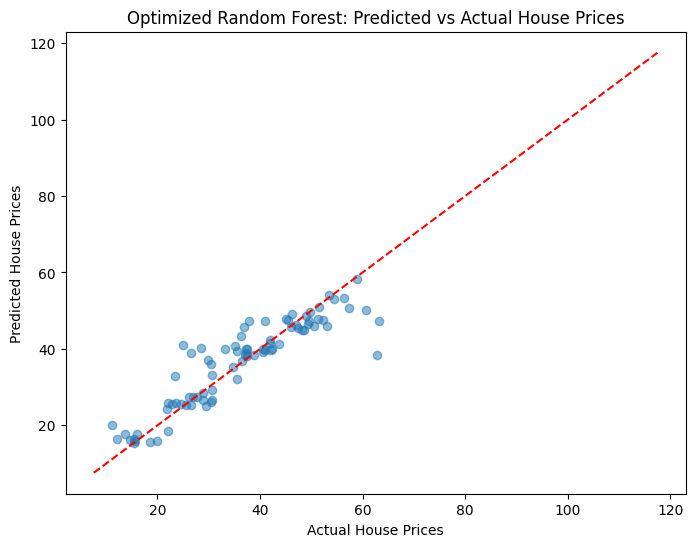

In [32]:
# Visualize predicted vs actual prices for Optimized Random Forest
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_best_rf, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r')
plt.xlabel('Actual House Prices')
plt.ylabel('Predicted House Prices')
plt.title('Optimized Random Forest: Predicted vs Actual House Prices')
plt.show()